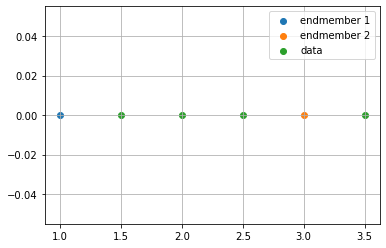

In [5]:
import numpy as np
import matplotlib.pyplot as plt
e1=np.array([1])
xaxis=np.array([0])
x=np.array([1.5,2,2.5,3.5])

plt.scatter(e1,xaxis,label='endmember 1')
e2=np.array([3])
xaxis=np.array([0])
plt.scatter(e2,xaxis,label='endmember 2')
xaxis=np.array([0,0,0,0])
plt.scatter(x,xaxis,label='data')
plt.legend()
plt.grid()

Random 2D data

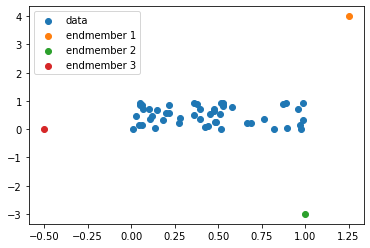

In [46]:
data=np.random.rand(50,2)
plt.scatter(data[:,0],data[:,1],label='data')
plt.scatter(1.25,4,label='endmember 1')
plt.scatter(1,-3,label='endmember 2')
plt.scatter(-0.5,0,label='endmember 3')
plt.legend()
